<h1>Regresión Lineal Multiple</h1>
<hr>

Una extensión útil de la regresión lineal es el caso en el que y es una función lineal de dos o más
variables independientes. Por ejemplo, y podría ser una función lineal de $x_1$ y $x_2$ , como en
> $$y = a_0 + a_1x_1 + a_2x_2 + e$$

<p>
En particular tal ecuación es útil cuando se ajustan datos experimentales donde la variable sujeta a estudio es una función de otras dos variables. En este caso bidimensional, la “línea” de regresión se convierte en un “plano”.
Como en los casos otros casos de regresion, los “mejores” valores para los coeficientes se determinan al realizar la suma de los cuadrados de los residuos,
</p>

 > $$ S_r = \sum_{i=1}^n (y_i - a_0 - a_1x_{1i} - a_2x_{2i})^2 $$


<p>Al proceder obtenemos la derivada de la ecuación anterior, respecto a cada uno de los coeficientes desconocidos del polinomio: </p>

> $$  \frac{\partial S_r}{\partial a_0} = -2 \sum  (y_i -a_0 -a_1x_i -a_2x_{2i})$$
> $$  \frac{\partial S_r}{\partial a_1} = -2 \sum x_{1i}(y_i -a_0 -a_1x_i -a_2x_{2i})$$
> $$  \frac{\partial S_r}{\partial a_2} = -2 \sum x_{2i}(y_i -a_0 -a_1x_i -a_2x_{2i})$$

<p>Los coeficientes que dan la suma mínima de los cuadrados de los residuos se obtienen al igualar a
cero las derivadas parciales y expresando el resultado en forma matricial:</p>


$$
\begin{pmatrix}
\begin{align*} 
n+ \sum x_{i1} + \sum x_{i2} =& \sum y_i \\
\sum x_{1i})+ \sum x_{1i}^2 + \sum x_{1i} x_{2i} =& \sum x_{1i} y_i \\
\sum x_{2i} + \sum x_{1i} x_{2i} + \sum x_{2i}^2 =& \sum x_{2i}y_i\\
\end{align*}
\end{pmatrix}
$$



Descripción gráfica de una regresión lineal múltiple donde $y$ es una función lineal de $x_1$ y $x_2$ .
<img src="imagen3.png" alt="Drawing" style="width: 200px;">

In [25]:
import numpy as np    # Importamos numpy para realizar calculos entre vectores, sumas, multiplicaciones, etc.
#import pylab as pl   # Importamos pylab para graficar los datos y la recta.
from decimal import * # Importamos la liberia decimal para tener mayor precision en los calculos.
import math           # Importamos la libreria math para realizar las operacion matematicas necesarias en minimos cuadrados 
import pandas as pd   # Importamos pandas para visualizar los datos
from sympy import *   # Importamos sympy para poder visualizar las matrices y operarlas si es necesario
import matplotlib.pyplot as plt     # Cargamos matplotlib.pyplot como el alias plt
init_printing(use_unicode=True)
from LeastSquares import LeastSquares # Importamos el modulo para regresion lineal simple
import GaussJordan  as ga # Modulo hecho por mi para solucionar sistemas de ecuacion por Gauss Jordan


In [26]:
class MultipleLinearRegression:
    def __init__(self, data):
        self.__data = data
        self.__matrix = np.zeros((self.getDimension(),self.getDimension())) # Asignamos una matriz de ceros con las dimensiones requeridas
        self.__vectorB = []
        self.__history = {}
        self.record = []
        self.loadMatrixMultiple() # Cargamos matriz de coeficientes
        self.loadVectorB() #Cargamos el vector B
        
    # Mediante este metodo cargaremos la matriz con todos los 
    # correspondientes valores para posteriormente
    # resolver con Eliminacion de Gauss Jordan
    def loadMatrixMultiple(self):
        for i in range(self.getDimension()):
            for j in range(self.getDimension()):
                if i + j == 0: # Establezco el primer valor n -> (cantidad de valores)
                    x = 'x'+str(i)
                    self.__matrix[i][j] = self.getSize()
                elif i == j and  i >= 1: # Recorro diagonal
                    x = 'x'+str(i)+'^2'
                    self.__matrix[i][j] = np.sum(self.__data[i]**2)
                    self.__history[x] = self.__data[i]**2
                elif i == 0 and j >= 1: #Recorro la columna [0]
                    x = 'yx'+str(j)
                    self.__matrix[i][j] = self.getSum(j)
                    self.__matrix[j][i] = self.getSum(j)
                    self.__history[x] = self.__data[0] * self.__data[j]
                elif i != j and  i >= 1 and j >= 1: #Recorro las posiciones restantes
                    x = '(x'+str(i)+'*'+'x'+str(j)+')'
                    multi = self.__data[j] * self.__data[i]
                    self.__matrix[i][j] = np.sum(multi)
                    self.__matrix[j][i] = np.sum(multi)
                    self.__history[x] = multi
    
    # Cargamos el vector B
    def loadVectorB(self):
        for i in range(self.getDimension()):
            if i == 0:
                self.__vectorB.append(np.sum(self.__data[i]))
            elif i >= 1:
                self.__vectorB.append(np.sum(self.__data[0] * self.__data[i]))
    
    def getVectorB(self):
        return np.array(self.__vectorB)
    
    def getHistory(self):
        return self.__history
    
    def getMatrix(self):
        return self.__matrix
    
    def getSize(self):
        return len(self.__data[0])
    
    def getData(self):
        return self.__data
    
    def getDimension(self):
        return len(self.__data)
    
    def getSum(self, key):
        return np.sum(self.__data[key])
 
    
    def getGraphic(self):
        plt.figure(1)
        #  Relacion entre los Costos del calentador y la temperatura externa media
        plt.subplot(221)
        plt.plot(data[1],data[0], '.')
        plt.yscale('linear')
        plt.title('Costos vs Temperatura')
        plt.grid(True)

        # Relacion entre los Costos del calentador  y el aislamiento de atico
        plt.subplot(222)
        plt.plot(data[2],data[0], '.r')
        plt.yscale('linear')
        plt.title('Costos vs Aislamiento Atico')
        plt.grid(True)

        # Relacion entre los Costos del calentador y la Antiguedad en Años 
        plt.subplot(223)
        plt.plot(data[3],data[0], '.k')
        plt.yscale('linear', linthreshy=0.01)
        plt.title('Costos vs Antiguedad')
        plt.grid(True)


        plt.subplots_adjust(top=1.0, bottom=0.008, left=0.010, right=0.95, hspace=0.27, wspace=0.65)
        plt.show()
    
    #Validar que todos los valores esten completos y sea equitativo
    def dataValidate(self):
        i = 1
        primero = 0
        data = self.getData()
        for key in data:
            if i == 1:
                primero = len(data[key])
            elif i > 1 and primero != len(data[key]):
                return False
            i = i + 1
    
    #Funcion que retorna los datos correspondientes a los valores independientes x1, x2, x3, etc y el
    # dependiente -> y.
    def getDataValues(self):
        data = {}
        for i in self.__data:
            if i > 0:
                x = 'x'+str(i)
                data[x] = self.__data[i]
            if i == 0:
                data['y'] = self.__data[i]
        data.update(self.__history)
        df = pd.DataFrame(data) 
        return df
    
    #Funcion que retorna los valores calculados para regresion lineal multiple en una tabla
    def getResultCalculate(self):
        df = pd.DataFrame(self.__history)
        return df
    
    #Mostramos la sumatoria del conjunto de valores dependientes e independientes
    def getSummationValues(self):
        data = []
        title = []
        
        for key in self.__history:
            x = 'Σ'+str(key)
            data.append(np.sum(self.__history[key]))
            title.append(x)
        df = pd.DataFrame(data, index= title, columns=['Resultado'])
        return df
    
    def getResultLinealRegresion(self):
        SquareCostTemperatura = LeastSquares(self.__data[1],self.__data[0]) #Minimos cuadrados costos vs temperatura
        SquareCostAislamiento = LeastSquares(self.__data[2],self.__data[0]) #Minimos cuadrados costos vs aislamiento atico
        SquareCostAntiguedad  = LeastSquares(self.__data[3],self.__data[0]) #Minimos cuadrados costos vs antiguedad años
        SquareCostTemperatura.getData()
        SquareCostAislamiento.getData()
        SquareCostAntiguedad.getData()

        # Resultados de costos vs temperatura
        result1 = [
        np.sum(SquareCostTemperatura.SquareResidue()),
        SquareCostTemperatura.R,
        SquareCostTemperatura.R2,
        SquareCostTemperatura.A1,
        SquareCostTemperatura.A0,
        SquareCostTemperatura.err
        ]
        # Resultados de costos vs aislamiento
        result2 = [
        np.sum(SquareCostAislamiento.SquareResidue()),
        SquareCostAislamiento.R,
        SquareCostAislamiento.R2,
        SquareCostAislamiento.A1,
        SquareCostAislamiento.A0,
        SquareCostAislamiento.err
        ]
        # Resultados de costos vs antiguedad
        result3 = [ 
        np.sum(SquareCostAntiguedad.SquareResidue()),
        SquareCostAntiguedad.R,
        SquareCostAntiguedad.R2,
        SquareCostAntiguedad.A1,
        SquareCostAntiguedad.A0,
        SquareCostAntiguedad.err
        ]

        title = ['Σ(y – A0 - A1X)²', 'R', 'R²', 'Pendiente','Intersección','Error Estandar']

        data = {
            'Resultados              ' : title, 
            'Costos vs Temperatura' : result1,
            'Costos vs Aislamiento' : result2,
            'Costos vs Antiguedad' : result3
        }
        df = pd.DataFrame(data)  # Visualizamos los resultados en de la regresion lineal simple
        return df

<h3>Planteamiento de problema.</h3>

Factores de costo de calefaccion en enero de una muestra de 20 casas.
    
Casa| Costo de Calefaccion ($) | Temperatura Externa media (°F) | Aislamiento de ático(pulgadas) | Antiguedad del Calentador (años)
--- | --- | --- | --- | --- | 
1   |250  |   35 |   3  | 6 |
2   |360  |   29 |   4  | 10 |
3   |165  |   36 |   7  | 3 |
4	|43   |   60 |   6  | 9|
5	|92   |   65 |   5  | 6|
6	|200  |   30 |   5  | 5|
7	|355  |   10 |   6  | 7|
8	|290  |    7 |   10 | 10|
9	|230  |   21 |   9  | 11|
10	|120  |   55 |   2  | 5|
11	|73   |   54 |   12 | 4|
12	|205  |   48 |   5  | 1|
13	|400  |   20 |   5  | 15|
14	|320  |   39 |   4  | 7|
15	|72   |   60 |   8  | 6|
16	|272  |   20 |   5  | 8|
17	|94   |   58 |   7  | 3|
18	|190  |   40 |   8  | 11|
19	|235  |   27 |   9  | 8|
20	|139  |   30 |   7  | 5|

Mediante los datos adquiridos se debe definir cual es la variable dependiente y las independientes:

<b>Dependiente</b>

- La variable dependiente $y$ es el costo de calefaccion en enero

<b>Independientes</b>

- La temperatura externa media en enero, representada por $x_1$.
- El numero de pulgadas de aislamiento del ático, representado por $x_2$.
- La antiguedad en años del calentador, representada por $x_3$.

Con las anteriores definiciones la forma general de la ecuacion de regresion múltiple es la siguiente:

> $$ y = a + b_1x_1 + b_2x_2 + b_3x_3 $$

A continuacion graficamos los datos para ver la relacion de las variables independientes $x_1$, $x_2$, $x_3$ con la dependiente $y$:















































In [27]:
#Definimos un diccionario en el que la variable dependiente y => 0, x1 => 1, x2 => 2 y x3 => 3.
data = {
    0 : np.array([250,360,165,43,92,200,355,290,230,120,73,205,400,320,72,272,94,190,235,139]),
    1 : np.array([35,29,36,60,65,30,10,7,21,55,54,48,20,39,60,20,58,40,27,30]),
    2 : np.array([3,4,7,6,5,5,6,10,9,2,12,5,5,4,8,5,7,8,9,7]),
    3 : np.array([6,10,3,9,6,5,7,10,11,5,4,1,15,7,6,8,3,11,8,5])
}
ml = MultipleLinearRegression(data)


 Procedemos a analizar el problema desde una perspectiva de regresion lineal simple, visualizamos la tendencia de los datos. A continuacion veremos en detalle los resultados de la regresion lineal por minimos cuadrados para cada variable independiente $X_{temperatura}$, $X_{aislamiento}$, $X_{antiguedad}$ con respecto a la variable dependiente $y_{costos}$.

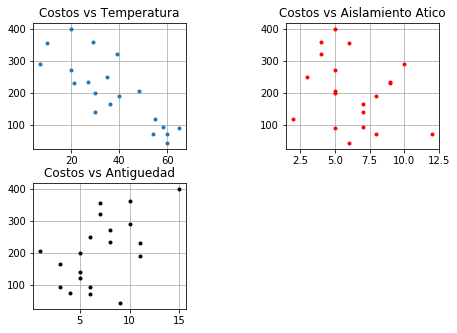

In [28]:
ml.getGraphic()

In [29]:
ml.getResultLinealRegresion()

,Costos vs Aislamiento,Costos vs Antiguedad,Costos vs Temperatura,Resultados
0,198841.785500,151579.731132,72700.808862,Σ(y – A0 - A1X)²
1,-0.257101,0.536728,-0.811509,R
2,0.066101,0.288076,0.658547,R²
3,-10.988846,17.009434,-4.934192,Pendiente
4,275.029172,86.183962,388.801952,Intersección
5,105.103596,91.766531,63.552607,Error Estandar


In [30]:
if ml.dataValidate() == False:
    print('Verifique que la cantidad de datos sea equitativa.')
else:
    gauss = ml.getMatrix()
    matrix = np.column_stack((ml.getMatrix(), ml.getVectorB())) #Unimos el vector B a la matriz 

Para predecir el costo de calefaccion en enero con la ecuacion de regresion es necesario conocer los valores de los coeficientes de regresion. Se procede a realizar los cálculos requeridos para desarrollar las ecuaciones normales y posteriormente se procede a resolver mediante un metodo como el de <b>Eliminacion de Gauss Jordan,</b> las sumatorias requeridas se calculan de la siguiente tabla:

In [31]:
ml.getDataValues()

,(x1*x2),(x1*x3),(x2*x1),(x2*x3),(x3*x1),(x3*x2),x1,x1^2,x2,x2^2,x3,x3^2,y,yx1,yx2,yx3
0,105,210,105,18,210,18,35,1225,3,9,6,36,250,8750,750,1500
1,116,290,116,40,290,40,29,841,4,16,10,100,360,10440,1440,3600
2,252,108,252,21,108,21,36,1296,7,49,3,9,165,5940,1155,495
3,360,540,360,54,540,54,60,3600,6,36,9,81,43,2580,258,387
4,325,390,325,30,390,30,65,4225,5,25,6,36,92,5980,460,552
5,150,150,150,25,150,25,30,900,5,25,5,25,200,6000,1000,1000
6,60,70,60,42,70,42,10,100,6,36,7,49,355,3550,2130,2485
7,70,70,70,100,70,100,7,49,10,100,10,100,290,2030,2900,2900
8,189,231,189,99,231,99,21,441,9,81,11,121,230,4830,2070,2530
9,110,275,110,10,275,10,55,3025,2,4,5,25,120,6600,240,600


<h3>Sumatoria</h3>

In [32]:
ml.getSummationValues() # Sumatorias 

,Resultado
Σyx1,124289
Σyx2,24786
Σyx3,32341
Σx1^2,33436
Σ(x1*x2),4640
Σ(x1*x3),4671
Σ(x2*x1),4640
Σx2^2,923
Σ(x2*x3),899
Σ(x3*x1),4671


<h3 style="text-align: center">Matriz de coeficientes</h3>

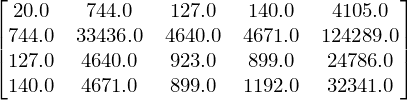

In [33]:
Matrix(matrix) # Matriz con las sumatorias requeridas

<h3>Metodo de Eliminacion de Gauss Jordan</h3>

Mediante el metodo de eliminacion de Gauss Jordan resolvemos el sistema de ecuaciones.

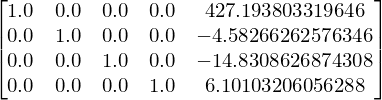

In [34]:
matricita = ga.GaussJordan(matrix)
x = [row[4] for row in matricita]
Matrix(matricita)

>Se requiere conocer el costo de calefaccion estimado de una casa si la temperatura externa media es de 30 grados, si el atico tiene 5 pulgadas de aislamiento y el calentador tiene 10 años. 

 $$X_{temperatura}=30°$$

 $$X_{aislamiento}= 5$$

 $$X_{antiguedad} =10$$

El polinomio requerido es el siguiente:

> $$Y = A + Bx_1 + Cx_2 + Dx_3$$

$$donde$$

> $$Y = A + B_{temperatura} + C_{aislamiento} + D_{antiguedad}$$

Para dar solucion a la pregunta se procede a reemplazar:

In [36]:
temperatura = 30 #  x1
aislamiento = 5  #  x2
antiguedad = 10  #  x3

A = x[0]
B = x[1] 
C = x[2]
D= x[3]

Y = A + B*temperatura + C*aislamiento + D* antiguedad
print("El costo de calefacion es:",Y)

El costo de calefacion es: 276.56993171521714
